In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

dates = pd.date_range(start='2023-01-01' , periods=365,freq='D')
values = [100+0.5 * i + 10*np.sin(2*np.pi*i/30) + np.random.randn()*5 for i in range(365)]

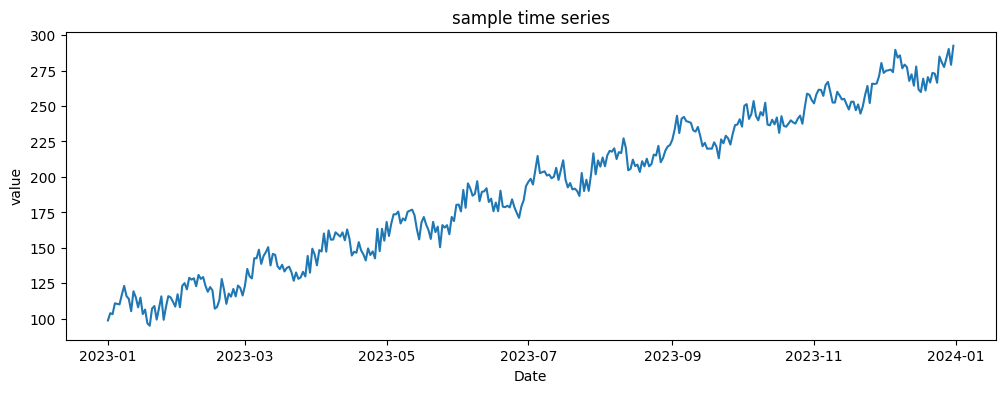

In [2]:
ts = pd.Series(values,index=dates)
plt.figure(figsize=(12,4))
plt.plot(ts)
plt.title('sample time series')
plt.xlabel('Date')
plt.ylabel('value')
plt.show()

In [2]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

data = np.cumsum(np.random.randn(100))

result = adfuller(data)

print(f'adf statistic : {result[0]:.4f}')
print(f'P-value : {result[1]:.4f}')

if result[1] <0.05:
    print("stationary")
else:
    print("Non -stationary -differencing needed")

adf statistic : -2.2349
P-value : 0.1938
Non -stationary -differencing needed


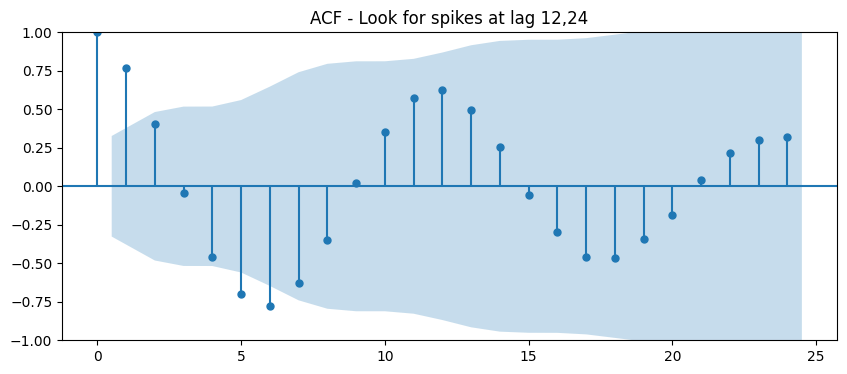

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

np.random.seed(42)
months = 36
seasonal_pattern = [10, 12, 15, 20, 25, 30, 32, 30, 25, 18, 12, 8] 
data = [seasonal_pattern[i%12] + np.random.randn()*2 for i in range(months)]

fig , ax = plt.subplots(figsize=(10,4))
plot_acf(data,lags=24,ax=ax)
plt.title('ACF - Look for spikes at lag 12,24')
plt.show()

In [9]:
import numpy as np
import pandas as pd

t = np.arange(10)
trend_data = 50 + 2*t + np.random.randn(10)*5

differenced = np.diff(trend_data)
print(f"Original mean: {trend_data.mean():.2f}")  # Changes over time
print(f"Differenced mean: {differenced.mean():.2f}")

Original mean: 59.51
Differenced mean: 2.77


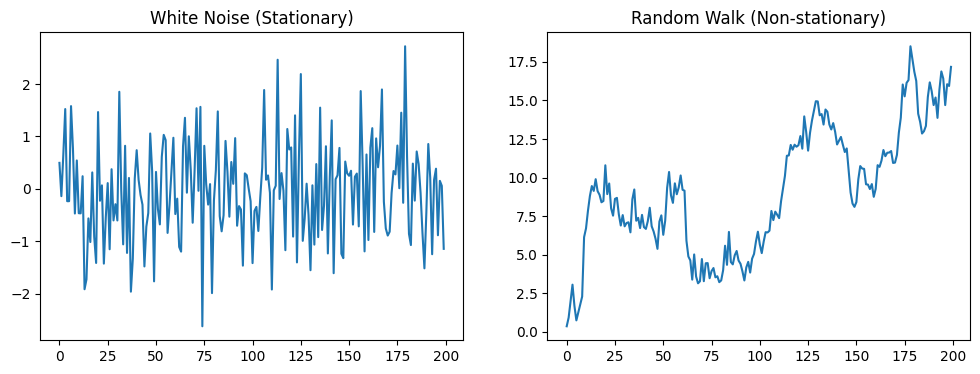

In [10]:

import numpy as np
import matplotlib.pyplot as plt

# Pipeline: Generate both -> Plot -> Compare ACF patterns

np.random.seed(42)
n = 200

# White Noise
white_noise = np.random.randn(n)

# Random Walk (cumulative sum of white noise)
random_walk = np.cumsum(np.random.randn(n))

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(white_noise)
axes[0].set_title('White Noise (Stationary)')

axes[1].plot(random_walk)
axes[1].set_title('Random Walk (Non-stationary)')
plt.show()

# Key observation: Random walk "wanders" far from origin; white noise stays bounded



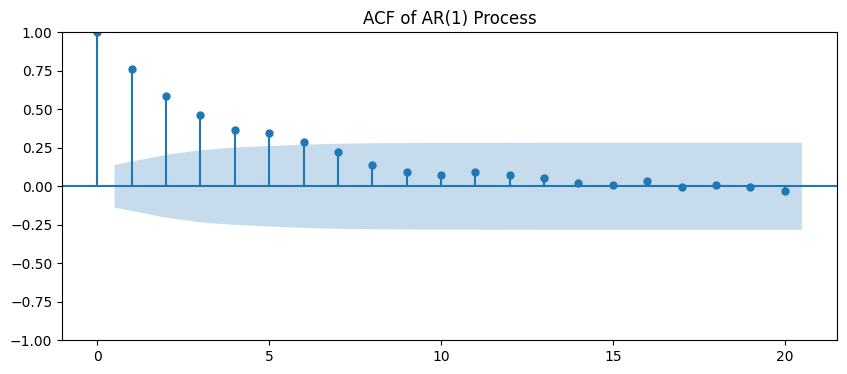

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n =  200
y  =np.zeros(n)
for t in range(1,n):
    y[t] = 0.8* y[t-1] + np.random.randn()
    
fig, ax = plt.subplots(figsize=(10, 4))
plot_acf(y, lags=20, ax=ax)
plt.title('ACF of AR(1) Process')
plt.show()

In [19]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Pipeline: Create trending data -> Difference -> Verify stationarity

# Step 1: Non-stationary data (random walk)
np.random.seed(42)
random_walk = np.cumsum(np.random.randn(100))

# Step 2: Apply first difference
differenced = np.diff(random_walk)

# Step 3: Test stationarity
def adf_test(data, name):
    result = adfuller(data)
    print(f"{name}: ADF={result[0]:.2f}, p-value={result[1]:.4f}")

adf_test(random_walk, "Original")      # p > 0.05 (non-stationary)
adf_test(differenced, "Differenced")

Original: ADF=-1.36, p-value=0.6021
Differenced: ADF=-10.01, p-value=0.0000
